[Home](Home.ipynb)

# Pascal's Triangle

Yes, Pascal's Triangle (PT) was known to scholars in much earlier times, in China.  The Tower of Hanoi, a puzzle, was not really from Hanoi.  We should not treat names as always conveying lots of implicit historical facts.  Names go into a namespace, as mnemonics within some API.

A fascinating aspect of PT is how easy it is to generate, through addition.  Addition seems the easiest algorithm in so many ways.  What it does is so straightforward.  However, the numbers do tend to widen out, and individual additions become huge chores, as the numbers ascend.  We're glad for our computing machines at this point.

Lets construct PT in the form of a Python generator.  Every time we iterate through it, looping one more time, a next row will appear.

In [1]:
def PT():
    row = [1]
    while True:
        yield row
        row = [left + right for (left, right) 
               in zip(row + [0], [0] + row)]  # stagger the row, add

In [2]:
rows = PT()

In [3]:
for _ in range(10):
    print(next(rows))

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


One of the many famous properties of the PT is how its rows bulge in the middle, value-wise, to describe a Bell Curve, what data scientists call a Normal Distribution, the limit approached by the Binomial Distribution. 

As the PT row number increases, and therefore columns also, we keep rescaling our XY plot to the same grid, making it smoother, upping the resolution. The total area beneath the curve is kept at one.

The curvaceous outcome of this limiting process is the Normal Distribution, also known as the Gaussian distribution.

We often bring up the PT in conjunction with what's called a Galton Board.  

The number of pathways a ball has to a bottom slot, corresponds to the PT number in that slot.  

For example, a ball has 126 pathways (permutations of left and right drops) to the middle two slots of the 9th row, counting from a 0th row of ```[1]```.

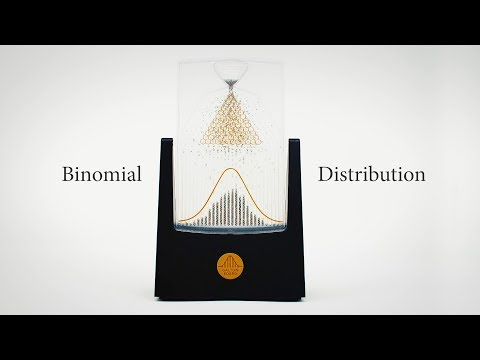

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("AwEaHCjgeXk")

Another property of PT is r is prime if and only if r, the number after 1 in each row (i.e. the rth row), evenly divides all coefficients in the same row (other than 1).

For example, row 3 is ```[1, 3, 3, 1]``` and 3 divides 3 evenly.  Take row 7:  7 evenly divides into ```[21, 35, 35, 21, 7]``` and so is prime also.

In [5]:
pt = PT()
[next(pt) for _ in range(10)] # toss
row = next(pt)
row

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

In [6]:
set(row[2:-1])

{10, 45, 120, 210, 252}

In [7]:
sum(set(row[2:-1]))

637

In [8]:
def prime_check(row):
    r = row[1]
    return not sum(set([c%r for c in row[2:-1]])) # divides all evenly

In [10]:
pt = PT()
primes = [ ]
next(pt)  # skip [1]
next(pt)  # skip [1, 1]
for _ in range(1000):
    row = next(pt)
    if prime_check(row):
        primes.append(row[1])

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


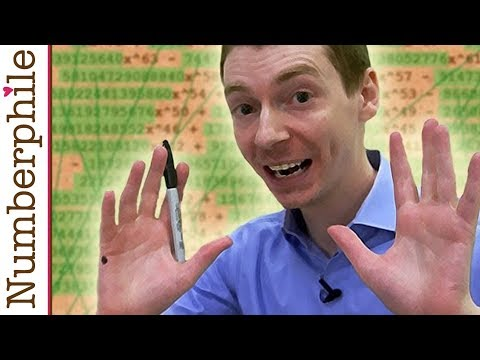

In [12]:
YouTubeVideo("HvMSRWTE2mI")

In [13]:
pt = PT()
pt.__next__()

[1]

In [14]:
next(pt)

[1, 1]

In [18]:
for row in pt:
    if len(row)>15:
        break
print(row)

[1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1]


Might we define PT using numpy arrays instead of ordinary Python lists?

In [19]:
import numpy as np

def PT2():
    row = np.array([1], dtype=object)
    while True:
        yield row
        row = np.insert(row,0,0) + np.append(row, 0)

In [24]:
pt = PT2()

In [25]:
for row in pt:
    print(row)
    if len(row)>12:
        break

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[1 4 6 4 1]
[1 5 10 10 5 1]
[1 6 15 20 15 6 1]
[1 7 21 35 35 21 7 1]
[1 8 28 56 70 56 28 8 1]
[1 9 36 84 126 126 84 36 9 1]
[1 10 45 120 210 252 210 120 45 10 1]
[1 11 55 165 330 462 462 330 165 55 11 1]
[1 12 66 220 495 792 924 792 495 220 66 12 1]
